In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics


In [2]:
#Read in your dataset
df = pd.read_csv("NBAPlayerStatistics.csv")
#display the possible predictors and outcomes
print(df.columns)

Index(['League', 'Name', 'Team', 'Position', 'GamesPlayed',
       'TotalMinutesPlayed', 'FieldGoalsMade', 'FieldGoalsAttempted',
       'ThreesMade', 'ThreesAttempted', 'FreeThrowsMade',
       'FreeThrowsAttempted', 'OffensiveRebounds', 'TotalRebounds', 'Assists',
       'Steals', 'Turnovers', 'Blocks', 'PersonalFouls', 'Disqualifications',
       'TotalPoints', 'Technicals', 'Ejections', 'FlagrantFouls',
       'GamesStarted'],
      dtype='object')


In [3]:
#enter in what you want your predictors to be
predictors = ['FieldGoalsMade','TotalRebounds','Assists']

#enter what you want your outcome to be
outcome ='GamesStarted'

In [11]:
X=df[predictors]
Y=df[outcome]

In [12]:
#Let's look at the predictors and outcome
print(X.head(5))
print(Y.head(5))

   FieldGoalsMade  TotalRebounds  Assists
0             272            252      138
1               5              4        0
2             579            627      160
3               1              5        2
4              46             82       16
0    75
1     0
2    78
3     0
4     3
Name: GamesStarted, dtype: int64


In [15]:
X.corr()

,FieldGoalsMade,TotalRebounds,Assists
FieldGoalsMade,1.000000,0.759348,0.670004
TotalRebounds,0.759348,1.000000,0.334738
Assists,0.670004,0.334738,1.000000


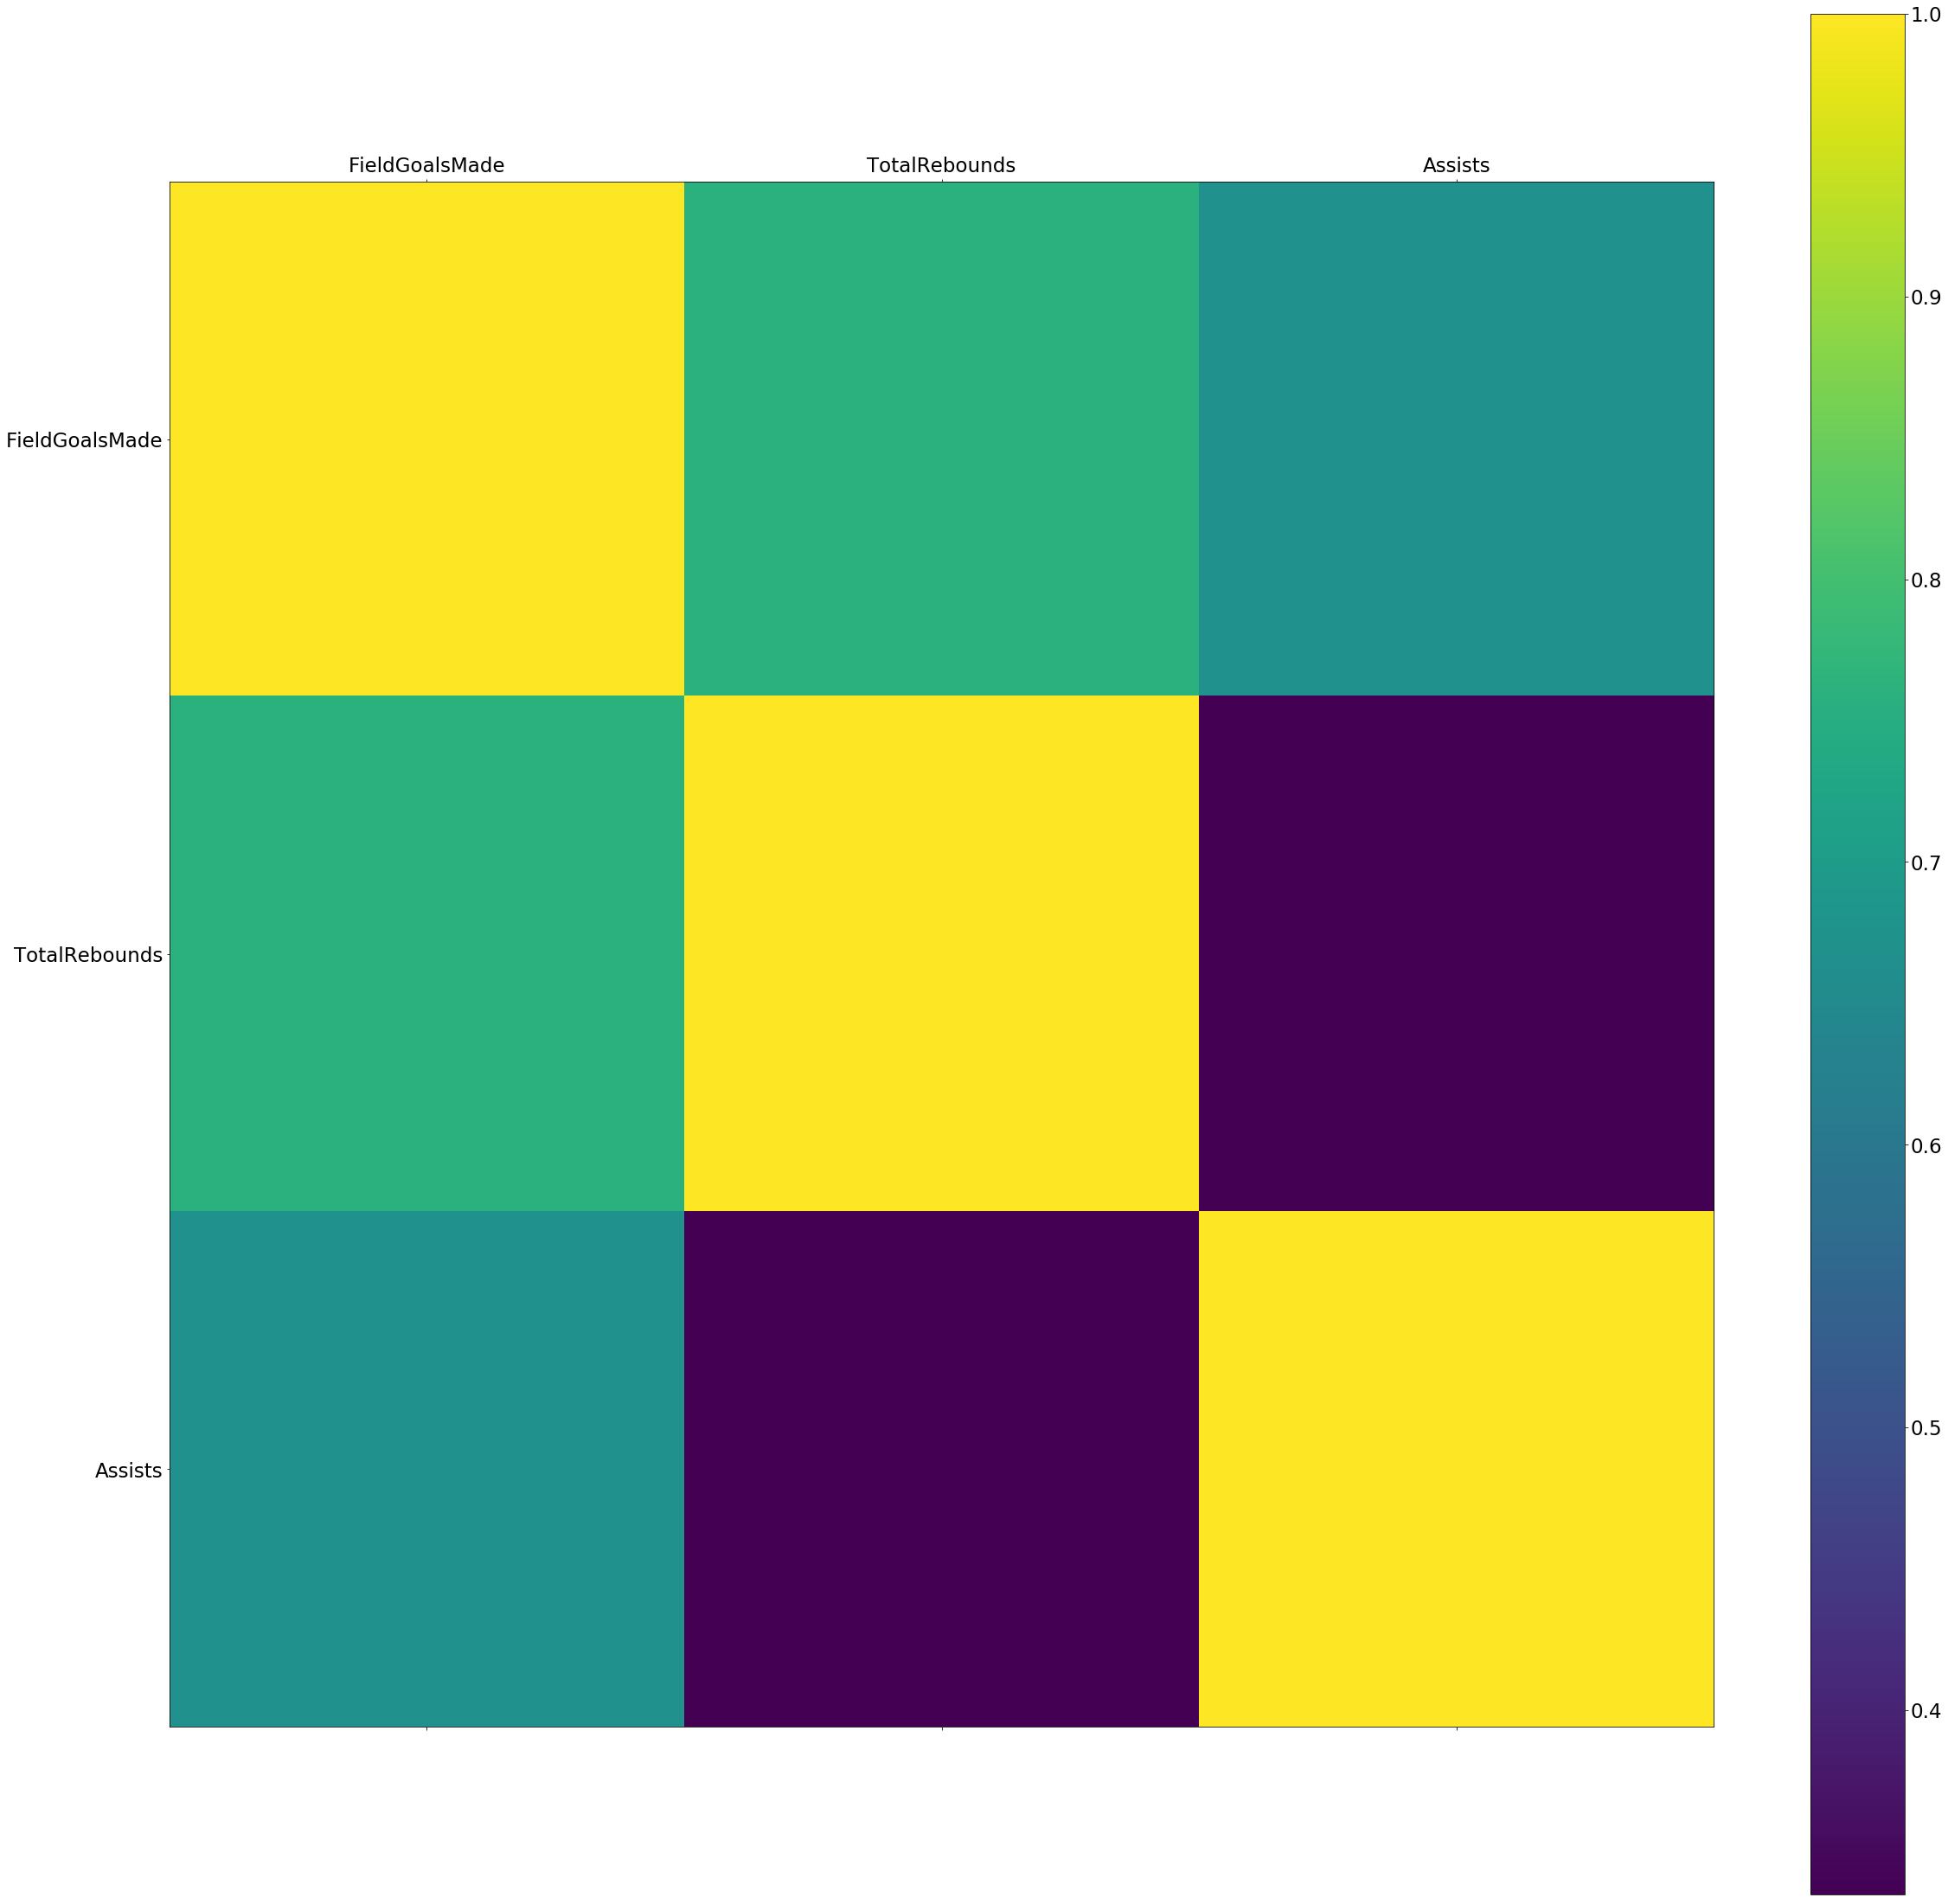

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualize correlation matrix using a heatmap
#change the font size and figure size if you have problem reading the labels
plt.rcParams['figure.figsize'] = (40, 40)
plt.rcParams['font.size'] = 23


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(X.corr())
fig.colorbar(cax)
ax.set_xticks(range(len(X.corr().index)))
ax.set_yticks(range(len(X.corr().index)))
ax.set_xticklabels(X.corr().index)
ax.set_yticklabels(X.corr().index)

plt.show()

In [19]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

-4.31490743863
[ 0.06707795  0.0515877   0.05143475]


In [21]:
lm = linear_model.LinearRegression().fit(X,Y)

In [24]:
from sklearn import cross_validation
kf = cross_validation.KFold(len(X), n_folds=10, shuffle=True)

In [25]:
rmse_values = []
scores = []
n= 0
print("#### CROSS VALIDATION each fold ####")
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    mse = metrics.mean_squared_error(y.iloc[test_index], lm.predict(X.iloc[test_index]))
    rmse_values.append(mse**.5)
    scores.append(lm.score(X.iloc[test_index], y.iloc[test_index]))
    n+=1
    print('Model', n)
    print('RMSE:', rmse_values[n-1])
    print('R2:', scores[n-1])


print("####  SUMMARY OF CROSS VALIDATION #####")
print('Mean of RMSE for all folds:', np.mean(rmse_values))
print('Mean of R2 for all folds:', np.mean(scores))

#### CROSS VALIDATION each fold ####
Model 1
RMSE: 17.4869516115
R2: 0.705464331126
Model 2
RMSE: 22.14871746
R2: 0.440788504118
Model 3
RMSE: 12.046791422
R2: 0.799091460399
Model 4
RMSE: 14.1476142385
R2: 0.792726959662
Model 5
RMSE: 17.0656275127
R2: 0.689822203296
Model 6
RMSE: 12.276674617
R2: 0.816212990371
Model 7
RMSE: 15.0069972376
R2: 0.767098883561
Model 8
RMSE: 20.2295432976
R2: 0.580525503499
Model 9
RMSE: 17.9510358998
R2: 0.641338988376
Model 10
RMSE: 13.5261984989
R2: 0.800856504884
####  SUMMARY OF CROSS VALIDATION #####
Mean of RMSE for all folds: 16.1886151796
Mean of R2 for all folds: 0.703392632929


In [26]:
print("### OLS ###")
lm = linear_model.LinearRegression().fit(X, Y)
print('OLS RMSE: ', metrics.mean_squared_error(y, lm.predict(X))**.5)
print('OLS R2:', lm.score(X, Y))

print("~~~ Ridge ~~~")
ridge = linear_model.RidgeCV(alphas=[0.1, 2.0, 20.0])
ridge.fit(X, Y)       
print('Ridge RMSE: ', metrics.mean_squared_error(y, ridge.predict(X))**.5)
print('Ridge R2:', ridge.score(X, Y))

### OLS ###
OLS RMSE:  16.3858282628
OLS R2: 0.708297247675
~~~ Ridge ~~~
Ridge RMSE:  16.3858282628
Ridge R2: 0.708297247674


In [27]:
kf = cross_validation.KFold(len(X), n_folds=8, shuffle=True)
OLS_rmse_values = []
Ridge_rmse_values = []
n= 0
print("#### CROSS VALIDATION each fold ####")
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    mse = metrics.mean_squared_error(y.iloc[test_index], lm.predict(X.iloc[test_index]))
    OLS_rmse_values.append(mse**.5)

    ridge = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0]).fit(X.iloc[train_index], y.iloc[train_index])
    mse = metrics.mean_squared_error(y.iloc[test_index], ridge.predict(X.iloc[test_index]))
    Ridge_rmse_values.append(mse**.5)

    n+=1


print("####  SUMMARY OF CROSS VALIDATION #####")
print('Mean of RMSE for OLS:', np.mean(OLS_rmse_values))
print('Mean of RMSE for Ridge:', np.mean(Ridge_rmse_values))

if np.mean(OLS_rmse_values) < np.mean(Ridge_rmse_values):print("OLS Performed Better")
if np.mean(OLS_rmse_values) > np.mean(Ridge_rmse_values):print("Ridge Performed Better")

#### CROSS VALIDATION each fold ####
####  SUMMARY OF CROSS VALIDATION #####
Mean of RMSE for OLS: 16.4698226466
Mean of RMSE for Ridge: 16.4698221435
Ridge Performed Better


In [28]:
del lm

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data= scaler.fit_transform(X)
lmgd = linear_model.SGDRegressor()
lmgd.fit(scaled_data, Y)
print("Gradient Descent RMSE:", metrics.mean_squared_error(Y, lmgd.predict(scaled_data))**.5) 
print("Gradient Descent R2:", lmgd.score(scaled_data, Y)) 

lm = linear_model.LinearRegression()
lm.fit(X, Y)
print("")
print('OLS RMSE: ', metrics.mean_squared_error(Y, lm.predict(X))**.5)
print('OLS R2:', lm.score(X, Y))

lm = linear_model.SGDRegressor()

Gradient Descent RMSE: 16.3893080222
Gradient Descent R2: 0.708173340218

OLS RMSE:  16.3858282628
OLS R2: 0.708297247675
